# K-means

具体想法：
    预设这堆数据是k类，我们随机从数据集中抽出k个数据作为这k类的质心。在此基础上计算其余样本到这k个质心的距离，挑选距离最短的质心所属的类作为该样本的类，在第一次判断了所有的距离之后，如果这个过程中有样本改变了类，就说明聚类没有结束，于是我们需要得到新的质心，取所有属于该类的均值（也有取其他统计量的）。得到新的质心之后，重复上述的更新类别的步骤。如果在某一个更新类别之后，并没有样本的类别进行了更新，说明我们的聚类已经完成，不再继续更新了，推出算法，得到最终的分类结果。


## k-means的具体代码

In [1]:
from numpy import *  
import time  
import matplotlib.pyplot as plt  
  
#定义函数用于计算欧几里得距离  
def euclDistance(vector1, vector2):  
    return sqrt(sum(power(vector2 - vector1, 2)))  
  
# init centroids with random samples  
def initCentroids(dataSet, k):    #获得初始质心
    numSamples,dim = dataSet.shape  
    centroids = zeros((k, dim))  
    for i in range(k):  
        index = int(random.uniform(0, numSamples))     #从最初的样本中随机选择k个样本作为初始质心
        #从[0,样本量]中均匀抽样，获得第i个指标
        #将原始数据中的第i个指标对应的数据赋给初始质心
        centroids[i, :] = dataSet[index, :]  
    return centroids  
  
# k-means cluster 主要算法 
def kmeans(dataSet, k):  
    numSamples = dataSet.shape[0]  
    # first column stores which cluster this sample belongs to,  
    # second column stores the error between this sample and its centroid  
    clusterAssment = mat(zeros((numSamples, 2)))    #将数据变换成Numpy矩阵
    clusterChanged = True  
  
    ## step 1: init centroids  
    centroids = initCentroids(dataSet, k)  
  
    while clusterChanged:  
        clusterChanged = False  
        ## for each sample  
        for i in range(numSamples):  
            minDist  = 100000.0    #初始最短距离
            minIndex = 0  
            ## for each centroid  
            ## step 2: find the centroid who is closest  
            for j in range(k):  
                distance = euclDistance(centroids[j, :], dataSet[i, :])   #计算每个样本与初始质心的距离
                if distance < minDist:   #如果距离小于阈值
                    minDist  = distance    #更新最短距离
                    minIndex = j  
                    #上面循环就是找出每个样本距离初始质心的最短距离
            ## step 3: update its cluster  
            if clusterAssment[i, 0] != minIndex:    #如果一开始没有分对，就进行更新
                clusterChanged = True  
                clusterAssment[i, :] = minIndex, minDist**2  #记录下所属的类别和对应距离
            
        #以上就更新了或者没有更新每个样本所属类别
        #接下来更新类别质心
  
        ## step 4: update centroids  
        for j in range(k):  
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]]  #把属于同一类的放在一起
            #.A是把矩阵转换为数组numpy
            #nonzero()返回哪些元素不是False或者0
            centroids[j, :] = mean(pointsInCluster, axis = 0)   #取均值作为他们的质心
  
    print ('cluster complete!')  
    return centroids, clusterAssment  
  
# show your cluster only available with 2-D data  
def showCluster(dataSet, k, centroids, clusterAssment):  
    numSamples, dim = dataSet.shape  
    if dim != 2:  #如果数据不是2维的，无法展示
        print( "Sorry! can not draw because the dimension of your data is not 2!" ) 
        return 1  
  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']   #这里默认最多10类
    if k > len(mark):  
        print("Sorry! Your k is too large!")  
        return 1  
  
    # draw all samples  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  #同一个类别的用同一个颜色
  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # draw the centroids  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markeredgecolor='c',markersize = 12)  
  
    plt.show()  

In [2]:
from numpy import *  
import time  
import matplotlib.pyplot as plt  
  
## step 1: load data  
print ("step 1: load data..." ) 
dataSet = []  
fileIn = open('cluster.txt')  
for line in fileIn.readlines():  
    lineArr = line.strip().split('\t')  
    dataSet.append([float(lineArr[0]), float(lineArr[1])])  

step 1: load data...


step 2: clustering...
80 2
cluster complete!
step 3: show the result...


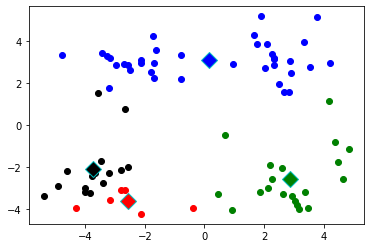

In [6]:
# step 2: clustering...  
print ("step 2: clustering...")  
dataSet = mat(dataSet)  
print(dataSet.shape[0],dataSet.shape[1])
k = 4
centroids, clusterAssment = kmeans(dataSet, k)  
  
## step 3: show the result  
print( "step 3: show the result..." ) 
showCluster(dataSet, k, centroids, clusterAssment)  

In [8]:
a1=mat([[1,1],[2,3],[4,2]])
print(a1)
a2=[[1,1],[2,3],[4,2]]
print(type(a2))

s=(1,3,4,5)
print(s,type(s))

a3=mat(s)  #矩阵化
print(a3,type(a3))

print(a1.A[1])

[[1 1]
 [2 3]
 [4 2]]
<class 'list'>
(1, 3, 4, 5) <class 'tuple'>
[[1 3 4 5]] <class 'numpy.matrix'>
[2 3]
